In [ ]:
! git clone https://github.com/Emanukka/reos.git

Cloning into 'reos'...
remote: Enumerating objects: 418, done.
remote: Counting objects: 100% (418/418), done.
remote: Compressing objects: 100% (281/281), done.
remote: Total 418 (delta 180), reused 348 (delta 113), pack-reused 0 (from 0)
Receiving objects: 100% (418/418), 1.01 MiB | 16.43 MiB/s, done.
Resolving deltas: 100% (180/180), done.


In [ ]:
# install rust compiler
%%bash
curl --proto '=https' --tlsv1.2 -sSf https://sh.rustup.rs -o rustup_script.sh
sh rustup_script.sh -y


  stable-x86_64-unknown-linux-gnu installed - rustc 1.89.0 (29483883e 2025-08-04)


Rust is installed now. Great!

To get started you may need to restart your current shell.
This would reload your PATH environment variable to include
Cargo's bin directory ($HOME/.cargo/bin).

To configure your current shell, you need to source
the corresponding env file under $HOME/.cargo.

This is usually done by running one of the following (note the leading DOT):
. "$HOME/.cargo/env"            # For sh/bash/zsh/ash/dash/pdksh
source "$HOME/.cargo/env.fish"  # For fish
source $"($nu.home-path)/.cargo/env.nu"  # For nushell


info: downloading installer
info: profile set to 'default'
info: default host triple is x86_64-unknown-linux-gnu
info: syncing channel updates for 'stable-x86_64-unknown-linux-gnu'
info: latest update on 2025-08-07, rust version 1.89.0 (29483883e 2025-08-04)
info: downloading component 'cargo'
info: downloading component 'clippy'
info: downloading component 'rust-docs'
info: downloading component 'rust-std'
info: downloading component 'rustc'
info: downloading component 'rustfmt'
info: installing component 'cargo'
info: installing component 'clippy'
info: installing component 'rust-docs'
info: installing component 'rust-std'
info: installing component 'rustc'
info: installing component 'rustfmt'
info: default toolchain set to 'stable-x86_64-unknown-linux-gnu'


In [ ]:
%%bash
export PATH="$HOME/.cargo/bin:$PATH"

rustc --version

rustc 1.89.0 (29483883e 2025-08-04)


In [ ]:
# install maturin via pip
!pip install maturin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 16.9 MB/s eta 0:00:00


In [ ]:
# change the dir to /content/reos/crates/reos_py, then compile reos with maturin
%%bash
export PATH="$HOME/.cargo/bin:$PATH"
cd /content/reos/crates/reos_py
maturin build --release

# .wheel file will be created inside /content/reos/crates/reos_py/target/wheels


    Updating crates.io index
     Locking 50 packages to latest compatible versions
      Adding numpy v0.24.0 (available: v0.25.0)
      Adding pyo3 v0.24.2 (available: v0.25.1)
  Downloaded approx v0.5.1
  Downloaded heck v0.5.0
  Downloaded itoa v1.0.15
  Downloaded autocfg v1.5.0
  Downloaded cfg-if v1.0.1
  Downloaded inventory v0.3.20
  Downloaded indoc v2.0.6
  Downloaded unindent v0.2.4
  Downloaded pyo3-macros v0.24.2
  Downloaded memoffset v0.9.1
  Downloaded paste v1.0.15
  Downloaded thiserror v2.0.12
  Downloaded unicode-ident v1.0.18
  Downloaded simba v0.9.0
  Downloaded typenum v1.18.0
  Downloaded wide v0.7.33
  Downloaded pyo3-macros-backend v0.24.2
  Downloaded num-bigint v0.4.6
  Downloaded serde_json v1.0.142
  Downloaded memchr v2.7.5
  Downloaded serde v1.0.219
  Downloaded portable-atomic v1.11.1
  Downloaded safe_arch v0.7.4
  Downloaded pyo3-ffi v0.24.2
  Downloaded proc-macro2 v1.0.95
  Downloaded portable-atomic-util v0.2.4
  Downloaded numpy v0.24.0
  Downl

In [ ]:
# install the package via pip install
!pip install /content/reos/crates/reos_py/target/wheels/reos-0.1.1-cp311-cp311-manylinux_2_34_x86_64.whl

Processing ./reos/crates/reos_py/target/wheels/reos-0.1.1-cp311-cp311-manylinux_2_34_x86_64.whl


In [ ]:
import sys
import os

#change the repository folder's name to not conflict with reos module
# sys.path.append("freos/python_examples/")


In [2]:
from freos.python_examples.auxiliary_functions.parameters import *
from freos.python_examples.auxiliary_functions.data import *
from freos.python_examples.auxiliary_functions.vle_functions import *


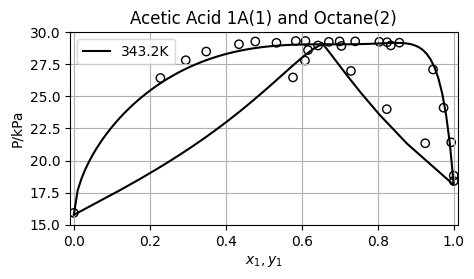

In [5]:
pACOH_OCT=CPAParameters.from_records(
    cubic=[c_acoh,c_octane],
    assoc=[a_acoh,a_octane])

pACOH_OCT.set_cubic_binary(0,1,0.0, 0.064)

ACOH_OCT=EquationOfState.cpa(pACOH_OCT)# print(pWATER_ACETIC.as_string())

# peq=PhaseEquilibrium(ACOH_OCT)

antoine=np.array([acoh_antoine,octane_antoine])
# p,y,vx=vle_diagram(T,peq,factor=1e3)

xorv,porv=acoh_octane["orv"]
xbol,pbol=acoh_octane["bol"]
exp_data=[xorv,porv,xbol,pbol]

T=343.2

PRES,LIQUID,VAPOR=linspace_bubble_p(ACOH_OCT,T,antoine,N=100)

bubble_diagram(
   PRES,
   LIQUID,
   VAPOR,
   factor=1e3,
   y_figsize=2.5,
   x_figsize=5,
   y_inf=15,
   y_sup=30,
   text=f"{T}K",
   title="Acetic Acid 1A(1) and Octane(2)",
   y_label="P/kPa",
   x_label=r"$x_1,y_1$",
   save_fig=False,

   exp_data=exp_data)